In [10]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [11]:
# Load the dataset
df = pd.read_csv('./recycling_survey.csv')
df.head()

,year,use_monthly,recycle_monthly,stay_campus,foreigner,faculty
0,3,Sometimes,0,Yes,No,Design and Engineering
1,3,Sometimes,0,Yes,No,Computing
2,4,Sometimes,0,No,No,Science
3,5,Sometimes,1,Yes,No,Design and Engineering
4,1,Often,3,No,No,Arts and Social Sciences


# Analysis

In [12]:
# Recode relevant columns
df['usage_category'] = df['use_monthly'].apply(lambda x: 'Low' if x in ['Rarely', 'Seldom'] else 'High')
df['habit_category'] = df['recycle_monthly'].apply(lambda x: 'Healthy' if x > 2 else 'Unhealthy')

# Find percentages of high and low usage vs healthy habits
# Group by usage category and calculate the proportion of healthy habits
rates = df.groupby('usage_category')['habit_category'].value_counts(normalize=True).unstack()
rates

habit_category,Healthy,Unhealthy
usage_category,,
High,0.015141,0.984859
Low,0.011419,0.988581


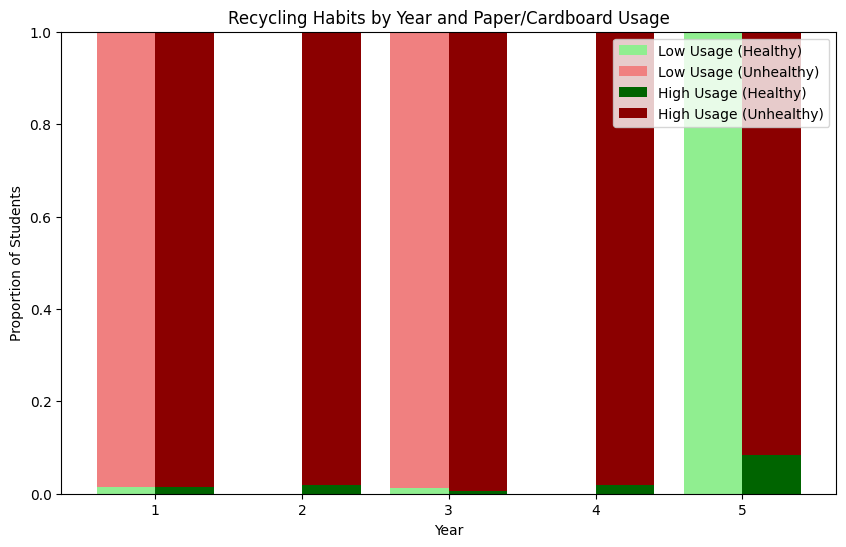

In [28]:
# Group by year and usage category, then calculate the proportion of habits
grouped = df.groupby(['year', 'usage_category'])['habit_category'].value_counts(normalize=True).unstack()

# Reset index to make the data easier to work with
grouped = grouped.reset_index()

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot stacked bars for each year
for i, year in enumerate(grouped['year'].unique()):
    year_data = grouped[grouped['year'] == year]
    
    # Plot low usage
    plt.bar(i - 0.2, year_data[year_data['usage_category'] == 'Low']['Healthy'].values[0], width=0.4, label='Low Usage (Healthy)' if i == 0 else "", color='lightgreen')
    plt.bar(i - 0.2, year_data[year_data['usage_category'] == 'Low']['Unhealthy'].values[0], width=0.4, bottom=year_data[year_data['usage_category'] == 'Low']['Healthy'].values[0], label='Low Usage (Unhealthy)' if i == 0 else "", color='lightcoral')
    
    # Plot high usage
    plt.bar(i + 0.2, year_data[year_data['usage_category'] == 'High']['Healthy'].values[0], width=0.4, label='High Usage (Healthy)' if i == 0 else "", color='darkgreen')
    plt.bar(i + 0.2, year_data[year_data['usage_category'] == 'High']['Unhealthy'].values[0], width=0.4, bottom=year_data[year_data['usage_category'] == 'High']['Healthy'].values[0], label='High Usage (Unhealthy)' if i == 0 else "", color='darkred')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Proportion of Students')
plt.title('Recycling Habits by Year and Paper/Cardboard Usage')
plt.xticks(range(len(grouped['year'].unique())), grouped['year'].unique())
plt.legend()
plt.show()
